In [8]:
path_head = r"G:\target_strength\2020_06_17_TS_submarine_50m_side\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [11]:
filelist_head = glob(path_head)

In [12]:
filelist_head

['G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1850_AI0_3k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1854_AI0_4k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1859_AI0_5k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1903_AI0_6k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1908_AI0_7k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1912_AI0_8k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1917_AI0_9k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_50m_side\\1921_AI0_10k.wav']

In [13]:
path_tank = r"G:\target_strength\2020_06_17_TS_submarine_50m_tank\*.wav"

In [14]:
filelist_tank = glob(path_tank)

In [15]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [7]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=1
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [14]:
# SL_raw = {}
# SL_report = {}
# for index, file in enumerate(filelist):
#     if index%2==0:
#         threshold = 0.12
#     else:
#         threshold = 0.06
#     a = SL(file)
#     a.readWavFileToArray()
#     a.findPeakIndex(threshold)
#     a.calculateSL()
#     data = a.getSL()
#     SL_raw[a.plot_title]=data
    
#     sl = np.array(data)
#     SL_report[a.plot_title]=(np.mean(sl))

In [26]:
filelist_head

['G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1710_AI0_3k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1714_AI0_4k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1717_AI0_5k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1722_AI0_6k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1727_AI0_7k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1732_AI0_8k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1736_AI0_9k.wav',
 'G:\\target_strength\\2020_06_17_TS_submarine_13m_head\\1741_AI0_10k.wav']

title: AI0_5k
total lenght: 25475000, time duration: 248


<IPython.core.display.Javascript object>


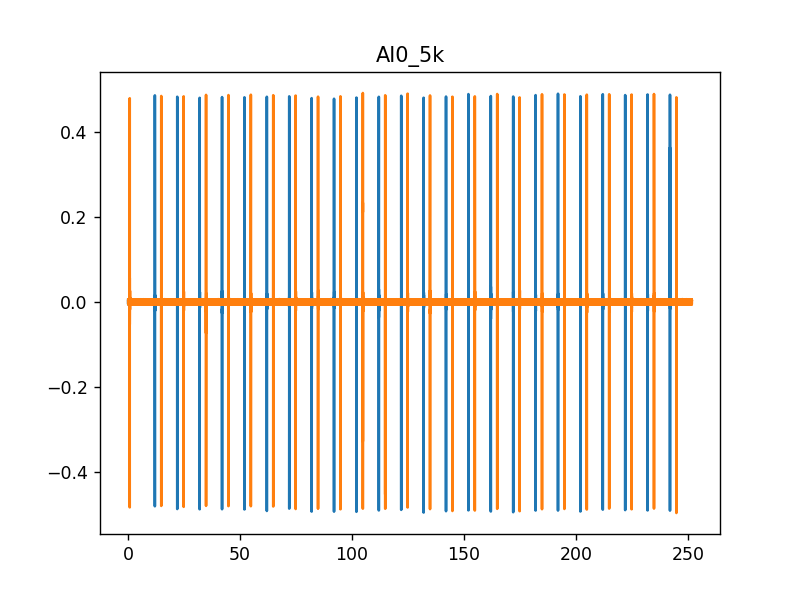

In [16]:
b = SL(filelist_head[2])
b.readWavFileToArray()
b.plot()

In [17]:
a = SL(filelist_tank[2])
a.readWavFileToArray()
a.plot()

title: AI0_5k
total lenght: 25775000, time duration: 251


In [18]:
b.findPeakIndex(0.2)
# b.plotWithFilterPeak()
# b.calculateSL()

total sound generated: 24


In [19]:
a.findPeakIndex(0.2)
# a.plotWithFilterPeak()
# a.calculateSL()

total sound generated: 25


In [20]:
index_head = b.getIndex()
index_tank = a.getIndex()

In [21]:
print("index_head number: {}".format(len(index_head)))
print("index_tank number: {}".format(len(index_tank)))

index_head number: 144
index_tank number: 150


In [22]:
144/24

6.0

In [23]:
150/25

6.0

In [22]:
print(index_tank[6*5])
print(index_head[6*5])

5815031
5212942


In [24]:
diff = index_tank[5*5:5*15]-index_head[5*5:5*15]
diff

array([-731415, -731416, -731416, -731415, -731416, -731416, -731415,
       -731416, -731416, -731415, -731416, -731416, -731415, -731416,
       -731416, -731415, -731416, -731416, -731415, -731416, -731416,
       -731415, -731416, -731416, -731415, -731416, -731416, -731415,
       -731416, -731416, -731415, -731416, -731415, -731415, -731416,
       -731416, -731415, -731416, -731415, -731415, -731415, -731416,
       -731415, -731416, -731415, -731415, -731415, -731416, -731415,
       -731416])

In [23]:
len(index_head)

162

In [25]:
data_head = b.getData()
data_tank = a.getData()

In [26]:
time_head = b.getTime()
time_tank = a.getTime()

In [27]:
shift = int(np.mean(diff))
shift

-731415

<IPython.core.display.Javascript object>


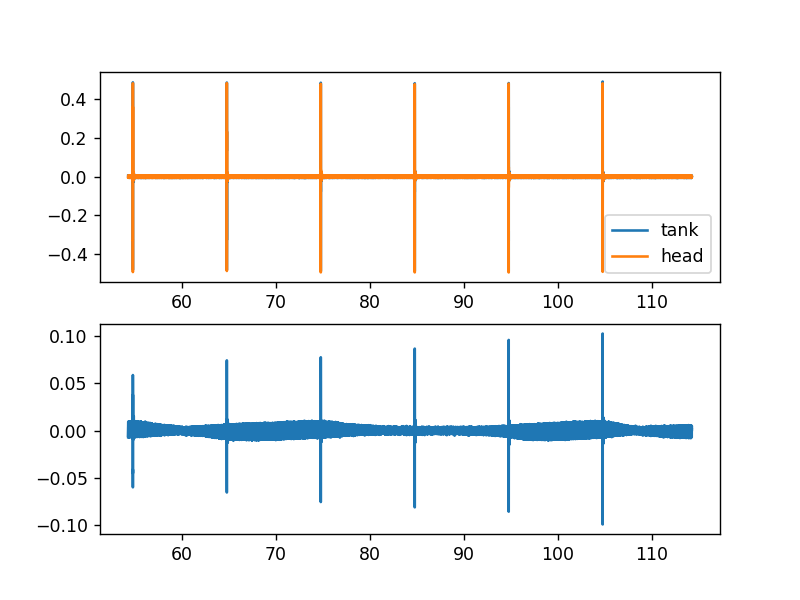

In [30]:
fig, ax = plt.subplots(2,1)
fs = 102400
time_tank_start = int(index_tank[6*5]-fs*0.5)
time_head_start = int(index_head[6*5]-fs*0.5)
end_tank = time_tank_start+fs*60
end_head = time_head_start+fs*60
shift=0
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_tank[time_tank_start+shift:end_tank], label="tank")
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_head[time_head_start:end_head-shift], label="head")
ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax[0].legend(loc=4)
# fig.tight_layout()

In [24]:
time_head_start

5161742

In [25]:
time_tank_start

5763831

In [ ]:
a.plot()
b.plot()

In [149]:
# SL_raw={}

In [39]:
SL_raw["AI1_3k"]=data
SL_raw

{'AI0_10k': [188.14384634670182,
  188.0664360971197,
  188.10466383117927,
  188.01822291963177,
  188.08354161576796,
  187.99968162884474,
  188.06533185535628,
  188.0262408442113,
  188.0334375588097,
  188.01156554456435,
  187.9851250391595,
  187.995080010442,
  187.95446609271974,
  187.97969934130762,
  187.9258744416,
  187.9810405845805,
  187.89836742859836,
  187.95948918738895,
  187.9211240901603,
  187.94523852141305,
  187.93868263400037,
  187.95567999873185,
  187.98380189222144,
  187.88500098609603],
 'AI1_10k': [182.56442335311414,
  182.60317524946487,
  182.45990503204536,
  182.5944693589226,
  182.50981596551873,
  182.57590719772543,
  182.4478553378164,
  182.49142851694765,
  182.52014671211037,
  182.4252783630684,
  182.53484274626595,
  182.4791076507207,
  182.47048874329428,
  182.39130173550137,
  182.48901648777462,
  182.3915067371215,
  182.46985426514257,
  182.3392019801245,
  182.48014214122318,
  182.2859277036252,
  182.4816816642713,
  182.4

In [80]:
# SL_report = {}

In [40]:
sl = np.array(data)
SL_report["AI1_3k"]=(np.mean(sl))
SL_report

{'AI0_10k': 187.99423493710864,
 'AI1_10k': 182.47263977415756,
 'AI0_9k': 190.08982395189435,
 'AI1_9k': 184.58243398594936,
 'AI0_8k': 192.76785788854215,
 'AI1_8k': 187.3553130601318,
 'AI0_7k': 194.65000514763494,
 'AI1_7k': 189.39665760867652,
 'AI0_6k': 195.25464341694735,
 'AI1_6k': 188.29626406961944,
 'AI0_5k': 196.66491891104772,
 'AI1_5k': 188.44834860407727,
 'AI0_4k': 193.2998247227839,
 'AI1_4k': 187.35901275556975,
 'AI0_3k': 185.76868478042059,
 'AI1_3k': 180.41336882866162}

In [82]:
sl_label = np.array(['3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k'])
sl_label

array(['3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k'], dtype='<U3')

In [73]:
sl_values = np.array(list(SL_report.values()))
sl_values

array([187.99423494, 182.47263977, 190.08982395, 184.58243399,
       192.76785789, 187.35531306, 194.65000515, 189.39665761,
       195.25464342, 188.29626407, 196.66491891, 188.4483486 ,
       193.29982472, 187.35901276, 185.76868478, 180.41336883])

<IPython.core.display.Javascript object>


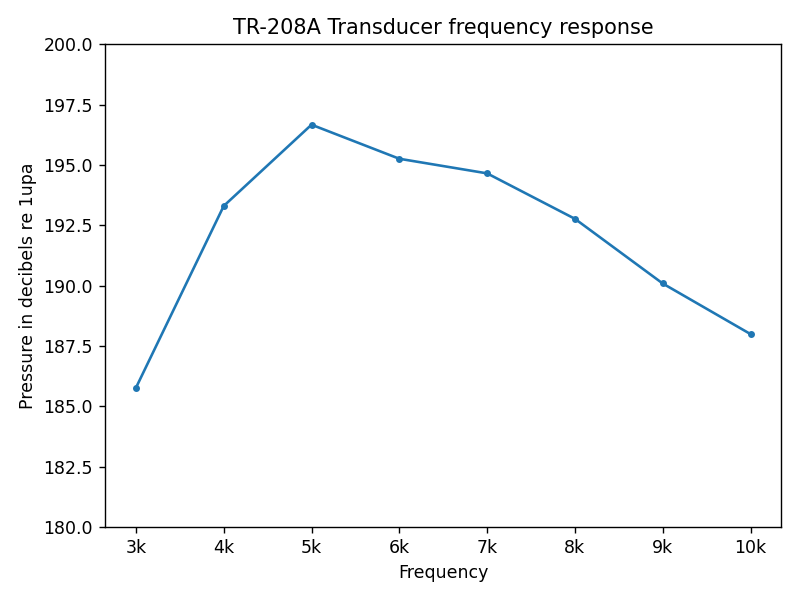

In [85]:
i = np.arange(1,9)
sl_values[-2*i]
fig, ax = plt.subplots()
ax.plot(sl_label, sl_values[-2*i],'.-')
ax.set_ylim(bottom=180, top=200)
ax.set_ylabel("Pressure in decibels re 1upa")
ax.set_xlabel("Frequency")
ax.set_title("TR-208A Transducer frequency response")
fig.tight_layout()

In [65]:
sl_label

array([187.99423494, 182.47263977, 190.08982395, 184.58243399,
       192.76785789, 187.35531306, 194.65000515, 189.39665761,
       195.25464342, 188.29626407, 196.66491891, 188.4483486 ,
       193.29982472, 187.35901276, 185.76868478, 180.41336883])

In [57]:
i

array([1, 2, 3, 4, 5, 6, 7, 8])

In [51]:
diff = []
for i in range(8):
    sl_list[2*i]-sl_list[2*i+1]
    diff.append(sl_list[2*i]-sl_list[2*i+1])

In [54]:
np.mean(np.array(diff))

6.0207443836920405

In [55]:
diff

[5.521595162951087,
 5.507389965944981,
 5.412544828410347,
 5.2533475389584225,
 6.958379347327906,
 8.216570306970453,
 5.9408119672141595,
 5.355315951758968]

In [212]:
np.save('SL_raw.npy', SL_raw)
np.save('SL_report.npy', SL_report)

In [211]:
read_dictionary = np.load('SL_raw.npy',allow_pickle='TRUE').item()
read_dictionary

{'AI0_4k': [193.45582863095808,
  193.3789095742987,
  193.4583004796921,
  193.37472411066196,
  193.4615750183203,
  193.38152984641826,
  193.462715654769,
  193.4346836673842,
  193.47650380251687,
  193.52373198278687,
  193.39501054885966,
  193.40283466788074,
  193.40097615913325,
  193.48493656673335,
  193.397846030888,
  193.49117446865236,
  193.40756068775437],
 'AI0_3k': [184.74421536530554,
  184.7465882251065,
  184.88377533171249,
  184.73113426157042,
  184.87631720729235,
  184.7473980245757,
  184.75484115546072,
  184.7393067775479,
  184.7680248925483,
  184.7667624227576,
  184.86138857311983,
  184.8310419059471,
  184.877073972583,
  184.86878928567467,
  184.86750417848393,
  184.77095298840783,
  184.74352376740643,
  184.87450266443489,
  184.8747613155726,
  184.73608536587187,
  184.87827381115204],
 'AI0_10k': [188.26610900428383,
  188.2379521192083,
  188.22364120716057,
  188.19507300934706,
  188.2014062100537,
  188.19051172812368,
  188.183868828500

In [ ]:
f, t, Sxx = signal.spectrogram(signal_s, fs, noverlap=128, nperseg=256, window="hann", 
                               mode='complex', return_onesided=False, scaling='spectrum')